In [26]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset and displaying the first five rows of the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Description of the data in the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

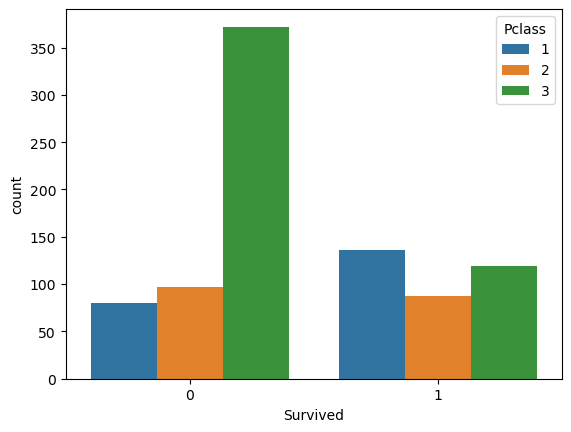

In [28]:
# Visualizing the number of survivors based on the passenger's class
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [29]:
# Creating a stratified train-test split based on Survived, Pclass and Sex
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(df, df[["Survived", "Pclass", "Sex"]]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]    

In [30]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S


In [31]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 265 to 704
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


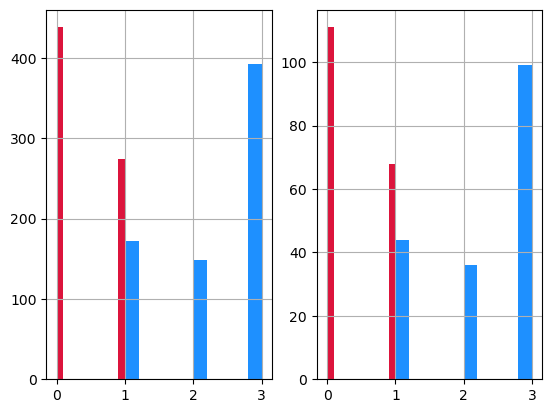

In [32]:
# Creating a side-by-side comparison of the distribution of 'Survived' and 'Pclass' columns 
# in the stratified training set (left) and stratified test set (right) using histograms.
# The left subplot displays the histograms for 'Survived' and 'Pclass' in the training set,
# while the right subplot displays the histograms for the same columns in the test set.
# The color 'crimson' is used for the 'Survived' column, and 'dodgerblue' is used for the 'Pclass' column.
plt.subplot(1,2,1)
strat_train_set['Survived'].hist(color='crimson')
strat_train_set['Pclass'].hist(color='dodgerblue')

plt.subplot(1,2,2)
strat_test_set['Survived'].hist(color='crimson')
strat_test_set['Pclass'].hist(color='dodgerblue')

plt.show()

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        # Impute missing values in the 'Age' column using the mean strategy
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Check if 'Embarked' and 'Sex' columns exist in the DataFrame
        if 'Embarked' in X.columns and 'Sex' in X.columns:
            # Encode 'Embarked' column using OneHotEncoder
            embarked_encoder = OneHotEncoder(sparse=False)
            embarked_matrix = embarked_encoder.fit_transform(X[['Embarked']])
            embarked_columns = [f"Embarked_{label}" for label in embarked_encoder.categories_[0]]

            # Add new columns to the DataFrame with One-Hot Encoded values for 'Embarked'
            for i, column in enumerate(embarked_columns):
                X[column] = embarked_matrix[:, i]

            # Encode 'Sex' column using OneHotEncoder
            sex_encoder = OneHotEncoder(sparse=False)
            sex_matrix = sex_encoder.fit_transform(X[['Sex']])
            sex_columns = [f"Sex_{label}" for label in sex_encoder.categories_[0]]

            # Add new columns to the DataFrame with One-Hot Encoded values for 'Sex'
            for i, column in enumerate(sex_columns):
                X[column] = sex_matrix[:, i]

            # Drop the original 'Embarked' and 'Sex' columns
            X = X.drop(['Embarked', 'Sex'], axis=1)

        return X

    
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        # Drop specified columns from the DataFrame
        # Columns to be dropped: "Embarked", "Name", "Ticket", "Cabin", "Sex", "N"
        # 'errors="ignore"' is used to ignore errors if any of the specified columns are not present
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")
from sklearn.pipeline import Pipeline
# AgeImputer: Imputes missing values in the 'Age' column using the mean strategy
# FeatureEncoder: One-Hot encodes the 'Embarked' and 'Sex' columns and adds new features to the DataFrame
# FeatureDropper: Drops specified columns ("Embarked", "Name", "Ticket", "Cabin", "Sex", "N") from the DataFrame
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])    
# Apply the defined pipeline to the training set (strat_train_set)
strat_train_set = pipeline.fit_transform(strat_train_set)

In [34]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
265,266,0,2,36.00000,0,0,10.5000,0.0,0.0,1.0,0.0,0.0,1.0
622,623,1,3,20.00000,1,1,15.7417,1.0,0.0,0.0,0.0,0.0,1.0
304,305,0,3,29.62363,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
200,201,0,3,28.00000,0,0,9.5000,0.0,0.0,1.0,0.0,0.0,1.0
66,67,1,2,29.00000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,0,2,54.00000,1,0,26.0000,0.0,0.0,1.0,0.0,0.0,1.0
791,792,0,2,16.00000,0,0,26.0000,0.0,0.0,1.0,0.0,0.0,1.0
421,422,0,3,21.00000,0,0,7.7333,0.0,1.0,0.0,0.0,0.0,1.0
227,228,0,3,20.50000,0,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 265 to 704
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    int64  
 1   Survived      712 non-null    int64  
 2   Pclass        712 non-null    int64  
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    int64  
 5   Parch         712 non-null    int64  
 6   Fare          712 non-null    float64
 7   Embarked_C    712 non-null    float64
 8   Embarked_Q    712 non-null    float64
 9   Embarked_S    712 non-null    float64
 10  Embarked_nan  712 non-null    float64
 11  Sex_female    712 non-null    float64
 12  Sex_male      712 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 77.9 KB


In [36]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the logistic regression classifier
log_reg_clf = LogisticRegression()

# Perform stratified cross-validation to evaluate the model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg_clf, X_data, y_data, cv=cv, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the SVM classifier on the entire training set
log_reg_clf.fit(X_data, y_data)

# Make predictions on the training set
y_pred = log_reg_clf.predict(X_data)

# Evaluate the accuracy on the training set
accuracy = accuracy_score(y_data, y_pred)
print("Training Set Accuracy:", accuracy)

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_data, y_pred)
class_report = classification_report(y_data, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Cross-Validation Scores: [0.76923077 0.7972028  0.78873239 0.83802817 0.77464789]
Mean Accuracy: 0.7935684034275583
Training Set Accuracy: 0.797752808988764
Confusion Matrix:
 [[377  61]
 [ 83 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       438
           1       0.76      0.70      0.73       274

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



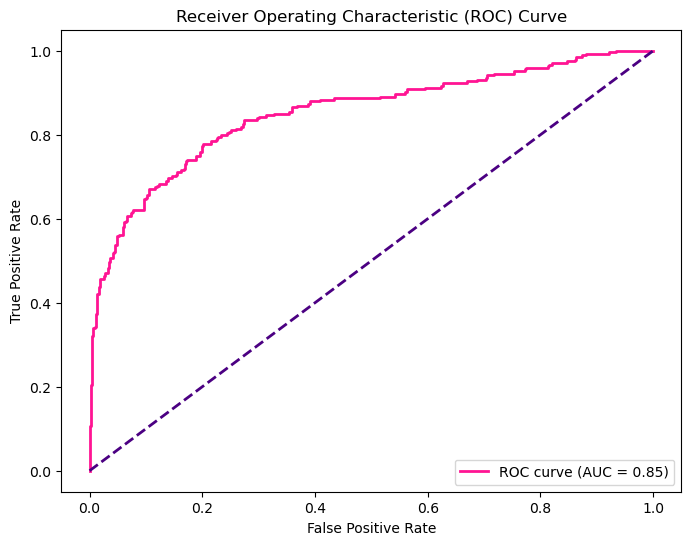

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

# Perform cross-validated predictions
y_scores = cross_val_predict(log_reg_clf, X_data, y_data, cv=cv, method="decision_function")

# Compute ROC curve and AUC score
# An AUC (Area Under the Curve) score closer to 1 indicates better model performance
fpr, tpr, thresholds = roc_curve(y_data, y_scores)
roc_auc = roc_auc_score(y_data, y_scores)

# Plot ROC (Receiver Operating Characteristic) curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='deeppink', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='indigo', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
